Dominic Flournoy - Final Problem Set Code

This first part shows the motion of a dual pendulum system, the first graph is with matching initial conditions and the second shows how slightly changing the initial condition makes the motion chaotic which is a requirement for chaos. The double pendulum class has the new equations of motion as solved w.r.t. the Hamiltonian. The graphing part is just an adaptation of previous codes to show the motion in time and in phase space of both of the pendulums.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [3]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout, Tab, Label, Checkbox
from ipywidgets import FloatSlider, IntSlider, Play, Dropdown, HTMLMath 

from IPython.display import display

In [4]:
class HamiltonianPendulum():
    """
    Pendulum class implements the parameters and Hamilton's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    omega_0 : float
        natural frequency of the pendulum (\sqrt{g/l} where l is the 
        pendulum length) 
    mass : float
        mass of pendulum

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L=1., mass=1., g=1.
                ):
        self.L1 = L
        self.L2 = L
        self.g = g
        self.omega_0 = np.sqrt(g/L)
        self.m1 = mass
        self.m2 = mass
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand sides of Hamilton's eqs
        [dq/dt dp/dt] --> [dphi/dt dp_phi/dt]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 2-component vector with y[0] = phi1(t) and y[2] = p_phi1(t), y[1] = phi2(t) and y[3] = p_phi2(t)
            
        Returns
        -------
        
        """
        ## equations for the double pendulum as a Hamiltonian
        C1 = (y[1]*y[3]*np.sin(y[0]-y[2]))/(self.L1*self.L2*(self.m1+self.m2*(np.sin(y[0]-y[2]))**2))
        C2 = (self.L2**2*self.m2*y[1]**2+self.L1**2*(self.m1+self.m2)*y[3]**2-self.L1*self.L2*self.m2*y[1]*y[3]*np.cos(y[0]-y[2]))*np.sin(2*(y[0]-y[2]))/(2*self.L2**2*self.L1**2*(self.m1+self.m2*(np.sin(y[0]-y[2]))**2)**2)
        
        return [(self.L2*y[1] + self.L1*y[3]*np.cos(y[0]-y[2]))/(self.L1**2*self.L1*(self.m1+self.m2*(np.sin(y[0]-y[2]))**2)), 
                -(self.m1+self.m2)*self.g*self.L1*np.sin(y[0])-C1+C2,
                (self.L1*(self.m1+self.m2) * y[3] -self.L2*y[1]*self.m2*np.cos(y[0]-y[2]))/(self.L1*self.L2**2*self.m2*(self.m1+self.m2*(np.sin(y[0]-y[2]))**2)),
                -self.m2*self.g*self.L2*np.sin(y[2])+C1-C2
               ]
    
    
    def solve_ode(self, t_pts, q_1, p_1,q_2,p_2, 
                  abserr=1.0e-10, relerr=1.0e-10):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [q_1, p_1, q_2, p_2] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        q1, p1, q2, p2 = solution.y

        return q1, p1, q2, p2

In [5]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [6]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [7]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
p_phi_vs_time_labels = (r'$t$', r'$p_\phi(t)$')
phase_space_labels = (r'$\phi$', r'$p_\phi$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 20.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L = 1.
g = 1.
mass = 1.

# Instantiate a pendulum 
p1 = HamiltonianPendulum(L=L, g=g, mass=mass)

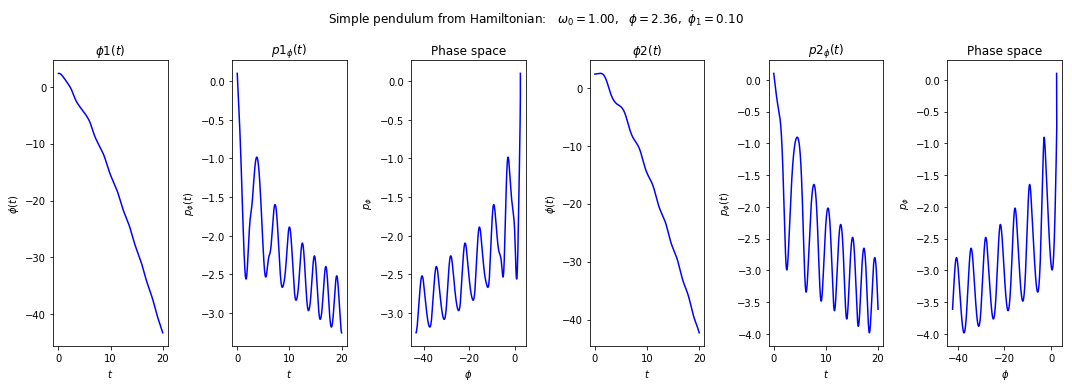

In [8]:
# both plots: same initial conditions
phi_1 = phi_2 = (3./4.)*np.pi
phi_dot_1 = phi_dot_2 = 0.1
p_phi_1 = p1.m1 * p1.L1**2 * phi_dot_1
p_phi_2 = p1.m2 * p1.L2**2 * phi_dot_1

phi1, p_phi1, phi2, p_phi2 = p1.solve_ode(t_pts, phi_1, p_phi_1, phi_2, p_phi_2)


# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Simple pendulum from Hamiltonian:  ' + \
                rf' $\omega_0 = {p1.omega_0:.2f},$' + \
                rf'  $\phi = {phi_1:.2f},$' + \
                rf' $\dot\phi_1 = {phi_dot_1:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi1 plot 
ax_a = fig.add_subplot(1,6,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop],
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\phi1(t)$', 
            ax=ax_a)    
                              
# second plot: p1_phi plot 
ax_b = fig.add_subplot(1,6,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], p_phi1[start : stop], 
            axis_labels=p_phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$p1_\phi(t)$', 
            ax=ax_b)    

# third plot: phase space plot  
ax_c = fig.add_subplot(1,6,3)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi1[start : stop], p_phi1[start : stop],
            axis_labels=phase_space_labels, 
            color='blue',
            label=None, 
            title='Phase space', 
            ax=ax_c)  
ax_d = fig.add_subplot(1,6,4)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi2[start : stop],
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\phi2(t)$', 
            ax=ax_d)    
                              
# fifth plot: p2_phi plot 
ax_e = fig.add_subplot(1,6,5)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], p_phi2[start : stop], 
            axis_labels=p_phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$p2_\phi(t)$', 
            ax=ax_e)    

# sixth plot: phase space plot  
ax_f = fig.add_subplot(1,6,6)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi2[start : stop], p_phi2[start : stop],
            axis_labels=phase_space_labels, 
            color='blue',
            label=None, 
            title='Phase space', 
            ax=ax_f)  

fig.tight_layout()
fig.savefig('simple_pendulum_Hamilton.png', bbox_inches='tight') 

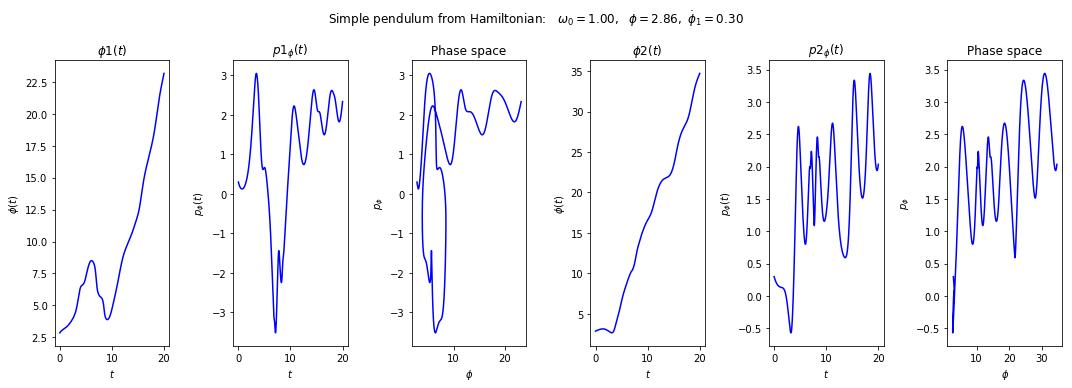

In [9]:
# both plots: same initial conditions
phi_1 = (3./4.)*np.pi+.5
phi_2 = (3./4.)*np.pi+.5
phi_dot_1 = .3
phi_dot_2 = 0.4
p_phi_1 = p1.m1 * p1.L1**2 * phi_dot_1
p_phi_2 = p1.m2 * p1.L2**2 * phi_dot_1

phi1, p_phi1, phi2, p_phi2 = p1.solve_ode(t_pts, phi_1, p_phi_1, phi_2, p_phi_2)


# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Simple pendulum from Hamiltonian:  ' + \
                rf' $\omega_0 = {p1.omega_0:.2f},$' + \
                rf'  $\phi = {phi_1:.2f},$' + \
                rf' $\dot\phi_1 = {phi_dot_1:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi1 plot 
ax_a = fig.add_subplot(1,6,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop],
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\phi1(t)$', 
            ax=ax_a)    
                              
# second plot: p1_phi plot 
ax_b = fig.add_subplot(1,6,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], p_phi1[start : stop], 
            axis_labels=p_phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$p1_\phi(t)$', 
            ax=ax_b)    

# third plot: phase space plot  
ax_c = fig.add_subplot(1,6,3)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi1[start : stop], p_phi1[start : stop],
            axis_labels=phase_space_labels, 
            color='blue',
            label=None, 
            title='Phase space', 
            ax=ax_c)  
ax_d = fig.add_subplot(1,6,4)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi2[start : stop],
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\phi2(t)$', 
            ax=ax_d)    
                              
# fifth plot: p2_phi plot 
ax_e = fig.add_subplot(1,6,5)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], p_phi2[start : stop], 
            axis_labels=p_phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$p2_\phi(t)$', 
            ax=ax_e)    

# sixth plot: phase space plot  
ax_f = fig.add_subplot(1,6,6)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi2[start : stop], p_phi2[start : stop],
            axis_labels=phase_space_labels, 
            color='blue',
            label=None, 
            title='Phase space', 
            ax=ax_f)  

fig.tight_layout()
fig.savefig('simple_pendulum_Hamilton.png', bbox_inches='tight') 

In [10]:
phi_1_w = FloatSlider(value=1.0, min=0.1, max=10., step=0.1,
                      description=r'$\phi_1$ :')
phi_2_w = FloatSlider(value=1.0, min=0.1, max=10., step=0.1,
                      description=r'$\phi_2$ :')
phidot_1_w = FloatSlider(value=1.0, min=0.1, max=10., step=0.1,
                      description=r'$\phi_dot1$ :')
phidot_2_w = FloatSlider(value=1.0, min=0.1, max=10., step=0.1,
                      description=r'$\phi_dot1$ :')
plot_out = widgets.interactive_output(fig,
                                      dict(
                                      phi_1=phi_1_w,
                                          phi_2=phi_2_w,
                                          phi_dot_1=phidot_1_w,
                                          phi_dot_2=phidot_2_w
                                      )
                                     )
UI_box = VBox([phi_1_w, phi_2_w,phidot_1_w, phidot_2_w, fig])
display(UI_box)   

TraitError: Element of the 'children' trait of a VBox instance must be a Widget, but a value of <Figure size 1080x360 with 6 Axes> <class 'matplotlib.figure.Figure'> was specified.

Here we begin the second half of the assignment in solving the two-body problem in Cartesian coordinates. Using the Lagrangian to solve we get the equation L=.5*(m_i*(x_dot_i^2-x_dot_j^2)+k*m_i*m_j*((x_i-x_j)^2+(y_i-y_j)^2)^(1/2). 
So using dL/dt = (d/dt)(dL/dx_i) this gives us x_i_dubdot=(k/m_i)*(x_i-x_j)*((x1-x2)^2+(y1-y2)^2)^(-3/2) and the y_dubdot is thus solved in the same manner. The application of these equations are then applied below to make the given orbits.

In [11]:
class orbit:
    """
    Solves the two body problem in cartesian coordinates with a potential in
    the form U = -k*mass_1*mass_2/r
    
    Parameters
    ----------
    mass1 and mass2 : float
        masses of the respective bodies.
    k : similar to the gravitational constant.
            

    Methods
    -------
    da_dt(a, t)
        Gives the right side of the differential equation in vector a
        
    solve_ode(t_pts, a)
        Solves the diff eq. for the given initial conditions in an 8-component vector 
        a
    """
    
    def __init__(self, mass_1, mass_2, k):
        self.mass_1 = mass_1
        self.mass_2 = mass_2
        self.k = k
        
    def dy_dt(self, a, t_pts):
        
        rel = ((a[0]-a[1])**2 + (a[2]-a[3])**2)**0.5
        
        
        x1_dubdot = (self.k / self.mass_2)*(a[0]-a[1])*(rel**-3) 
        x2_dubdot = (self.k / self.mass_1)*(a[1]-a[0])*(rel**-3) 
        y1_dubdot = (self.k / self.mass_2)*(a[2]-a[3])*(rel**-3) 
        y2_dubdot = (self.k / self.mass_1)*(a[3]-a[2])*(rel**-3) 
        
        return [a[4], a[5], a[6], a[7], x1_dubdot, x2_dubdot, y1_dubdot, y2_dubdot]
        

    def solve_ode(self, t_pts, a, abserr=1.0e-8, relerr=1.0e-8):
        
        orb = odeint(self.dy_dt, a, t_pts, atol=abserr, rtol=relerr).T
        
        return orb

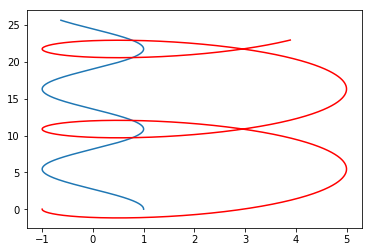

In [21]:
path = orbit(mass_1 = 1.0, mass_2 = 3.0, k = -4.0)

t_pts = np.arange(0, 50.0, 0.01)

x1_0 = 1.0
x2_0 = -1.0
y1_0 = 0.0
y2_0 = 0.0

x1dot_0 = 0.0
x2dot_0 = 0.0
y1dot_0 = 1.0
y2dot_0 = -1.0


a = [x1_0, x2_0, y1_0, y2_0, x1dot_0, x2dot_0, y1dot_0, y2dot_0]

orb = path.solve_ode(t_pts, a)

fig = plt.figure()

plt.plot(orb[0],orb[2])
plt.plot(orb[1],orb[3], color = 'red')

And from the graph we see these have circular orbits around a common center of mass aass it goes through its range of time. With this we can see how the problem would reduce to the problems in class if one mass was much heavier because both would technically still be moving around the common center of mass but with one mass being sufficiently large enough, this center could lie within the planets radius thus making it seem as if its not really moving